In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer


In [7]:
# Load dataset
df = pd.read_csv("India_new_car_sales_by_make.csv")  # Update with actual file path

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)


Missing Values:
 Year         0
Month        0
Make        10
Quantity     0
Pct          0
dtype: int64


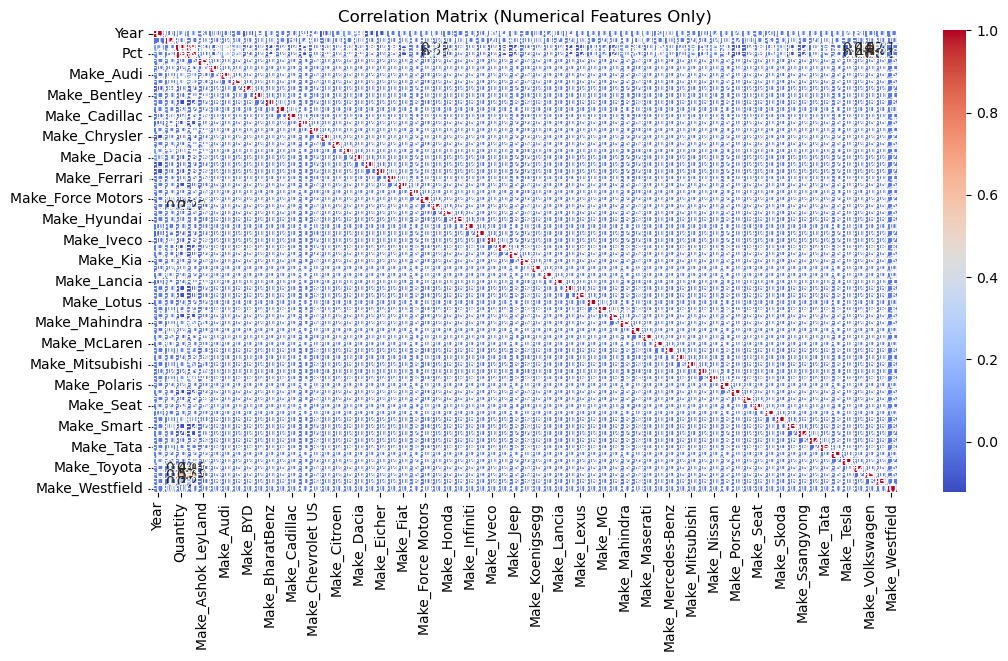

In [8]:
# Convert categorical "Make" to numerical using One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=["Make"], drop_first=False)

# Compute correlation matrix with only numerical values
corr_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()


In [9]:
df

,Year,Month,Make,Quantity,Pct
0,2015,1,Toyota,2884,22.7
1,2015,1,Volkswagen,2521,19.9
2,2015,1,Mahindra,1029,8.1
3,2015,1,Ford,870,6.9
4,2015,1,Volvo,693,5.5
...,...,...,...,...,...
4372,2025,1,Force Motors,3,0.0
4373,2025,1,Maserati,2,0.0
4374,2025,1,Ferrari,1,0.0
4375,2025,1,Smart,1,0.0


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop(columns=["Quantity", "Pct"])  # Drop target columns
y = df_encoded["Quantity"]  # Predicting car sales

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Standard Scaling (important for some ML models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
rf_pred = rf_model.predict(X_test_scaled)


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute performance metrics
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Print results
print("\n🔹 Random Forest Regression Performance:")
print(f"MAE: {rf_mae:.2f}")  # Mean Absolute Error
print(f"MSE: {rf_mse:.2f}")  # Mean Squared Error
print(f"R² Score: {rf_r2:.2f}")  # Coefficient of Determination



🔹 Random Forest Regression Performance:
MAE: 52.74
MSE: 9793.80
R² Score: 0.94


In [14]:
# Example input for future prediction
future_data = pd.DataFrame({
    "Year": [2026],
    "Month": [1],
    "Make_Toyota": [1],  # Update based on the car brand
    "Make_Volkswagen": [0],  # Set all other makes to 0
    "Make_Mahindra": [0],
    "Make_Ford": [0],
    # Add all other brands with 0 values
})

# Align columns with training data
future_data = future_data.reindex(columns=X.columns, fill_value=0)

# Scale input
future_data_scaled = scaler.transform(future_data)

# Predict future sales
future_pred = rf_model.predict(future_data_scaled)

print(f"\n🚗 Predicted Sales for Jan 2026 (Toyota): {future_pred[0]:.0f} units")



🚗 Predicted Sales for Jan 2026 (Toyota): 1491 units


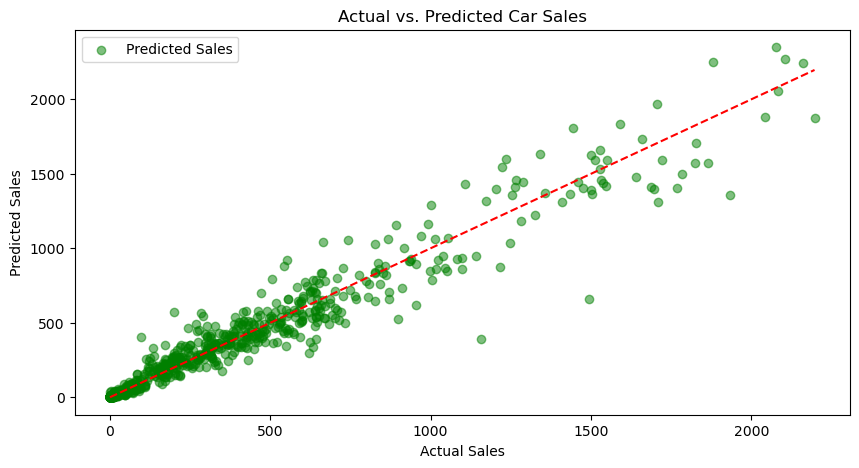

In [15]:
# Scatter Plot: Actual vs. Predicted Sales
plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_pred, alpha=0.5, color="green", label="Predicted Sales")

# Perfect prediction line (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Car Sales")
plt.legend()
plt.show()


In [22]:
# Step 1: Predict Future Sales for All Car Brands (Example: Jan 2026)
future_makes = ["Toyota", "Volkswagen", "Mahindra", "Ford", "Volvo"]  # Add all makes

future_predictions = {}
total_future_sales = 0  # To store total predicted sales for Jan 2026

for make in future_makes:
    # Create a future data frame for each brand
    future_data = pd.DataFrame({
        "Year": [2027],
        "Month": [1],
        **{f"Make_{m}": [1 if m == make else 0] for m in future_makes},  # One-Hot Encoding
    })

    # Align columns with training data
    future_data = future_data.reindex(columns=X.columns, fill_value=0)

    # Scale input
    future_data_scaled = scaler.transform(future_data)

    # Predict sales
    future_sales = rf_model.predict(future_data_scaled)[0]
    future_predictions[make] = future_sales
    total_future_sales += future_sales  # Sum total sales

# Print predicted sales
print("\n🚗 Predicted Car Sales for January 2026:")
for make, sales in future_predictions.items():
    print(f"{make}: {sales:.0f} units")

print(f"\n📊 Total Predicted Sales (Jan 2026): {total_future_sales:.0f} units")



🚗 Predicted Car Sales for January 2026:
Toyota: 1491 units
Volkswagen: 1775 units
Mahindra: 438 units
Ford: 652 units
Volvo: 392 units

📊 Total Predicted Sales (Jan 2026): 4749 units


In [23]:
# Step 2: Compute Percentage Share
future_pct = {make: (sales / total_future_sales) * 100 for make, sales in future_predictions.items()}

# Print predicted market share
print("\n📈 Predicted Market Share (%) for January 2027:")
for make, pct in future_pct.items():
    print(f"{make}: {pct:.2f}%")



📈 Predicted Market Share (%) for January 2027:
Toyota: 31.40%
Volkswagen: 37.38%
Mahindra: 9.23%
Ford: 13.73%
Volvo: 8.26%


C:\Users\PYTHON\AppData\Local\Temp\ipykernel_9656\608207228.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Make", y="Predicted_Sales", data=future_sales_df, palette="Blues_r")
C:\Users\PYTHON\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


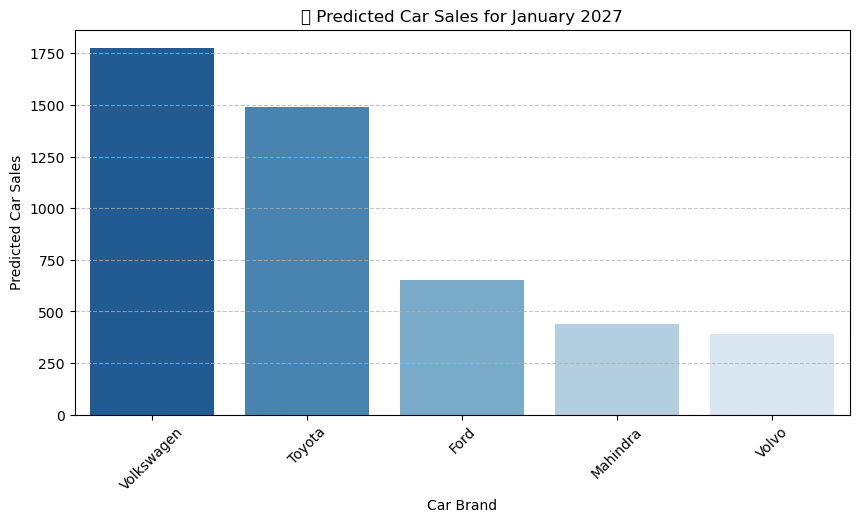

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert predictions to DataFrame
future_sales_df = pd.DataFrame(list(future_predictions.items()), columns=["Make", "Predicted_Sales"])

# Sort by sales for better visualization
future_sales_df = future_sales_df.sort_values(by="Predicted_Sales", ascending=False)

# Plot Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x="Make", y="Predicted_Sales", data=future_sales_df, palette="Blues_r")

# Labels & Title
plt.xlabel("Car Brand")
plt.ylabel("Predicted Car Sales")
plt.title("🚗 Predicted Car Sales for January 2027")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()
